# Analysis of Flights in Brazil from 2019-2021

GOAL: In this project I explore a dataset containing information about Brazilian flights and use matplotlib data visualisation techniques to graphically display basic yet insightful trends

I start by importing the necessary modules as well as the dataset itself. Then briefly analyse the data to look for any inconsisitencies or errors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import datetime, timedelta

In [2]:
flights = pd.read_csv("raw_2021.csv")
flights

C:\Users\Zain\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,6,7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,company,flight,auth_code,line_type,origin,destination,scheduled_dep,real_dep,scheduled_arr,real_arr,situation,jus_code
0,AZU,2497,0,N,SBMO,SBRF,NaN,NaN,2019-06-07 21:50:00,2019-06-07 21:39:00,REALIZADO,NaN
1,AZU,2493,0,N,SBMK,SBCF,NaN,NaN,2019-06-07 20:30:00,2019-06-07 20:30:00,REALIZADO,NaN
2,AZU,2489,0,N,SBRF,SBGR,NaN,NaN,2019-06-07 23:35:00,2019-06-07 23:35:00,REALIZADO,NaN
3,AZU,2488,0,N,SBGR,SBRF,NaN,NaN,2019-06-07 08:20:00,2019-06-07 08:11:00,REALIZADO,NaN
4,AZU,2487,0,N,SBFL,SBKP,NaN,NaN,2019-06-07 17:45:00,2019-06-07 17:45:00,REALIZADO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1592596,AZU,2503,0,N,SBPL,SBKP,NaN,NaN,2019-06-07 06:35:00,2019-06-07 06:31:00,REALIZADO,NaN
1592597,AZU,2502,0,N,SBRF,SBSG,NaN,NaN,2019-06-07 15:25:00,2019-06-07 15:05:00,REALIZADO,HD
1592598,AZU,2500,0,N,SBKP,SBPL,NaN,NaN,2019-06-08 02:35:00,2019-06-08 02:18:00,REALIZADO,HD
1592599,AZU,2499,0,N,SBJU,SBKP,NaN,NaN,2019-06-07 05:25:00,2019-06-07 05:09:00,REALIZADO,HD


In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592601 entries, 0 to 1592600
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   company        1592601 non-null  object
 1   flight         1592601 non-null  object
 2   auth_code      1591965 non-null  object
 3   line_type      1591076 non-null  object
 4   origin         1592601 non-null  object
 5   destination    1592601 non-null  object
 6   scheduled_dep  248305 non-null   object
 7   real_dep       236345 non-null   object
 8   scheduled_arr  1590127 non-null  object
 9   real_arr       1546221 non-null  object
 10  situation      1592601 non-null  object
 11  jus_code       407030 non-null   object
dtypes: object(12)
memory usage: 145.8+ MB


In [24]:
flights.describe()

<ipython-input-24-b66fc5ef1cbb>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  flights.describe()
<ipython-input-24-b66fc5ef1cbb>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  flights.describe()


,company,flight,auth_code,line_type,origin,destination,scheduled_dep,real_dep,scheduled_arr,real_arr,situation,jus_code,origin_city,dest_city,arr_day
count,1592601,1592601,1591965,1591076,1592601,1592601,248305,236345,1590127,1546221,1592601,407030,1455563,1455638,1546221
unique,131,7701,24,9,481,481,48696,142245,242566,722315,3,47,181,181,7
top,AZU,0506,0,N,SBGR,SBGR,2021-06-28 09:00:00,2021-06-16 08:55:00,2019-12-06 20:25:00,2020-01-08 19:00:00,Completed,AT,São Paulo / Guarulhos,São Paulo / Guarulhos,Fri
freq,512480,1587,1206357,1323814,230217,231692,25,9,29,20,1554292,128788,230217,231692,236774
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-21 09:35:00,2017-10-21 09:35:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-03 01:45:00,2202-02-18 13:59:00,NaN,NaN,NaN,NaN,NaN


Observations so far:
- Only company codes given, not airline names
- Only origin and destination codes are given, not location names
- Most departure dates are missing whereas most arrival dates are intact
- Some dates in "real_arr" (real arrival) are outside of the 2019-2021 range

In [5]:
flights = flights[((flights["real_arr"].sort_values()>"2019-01-01 00:00:00")&(flights["real_arr"].sort_values()<"2021-07-02 00:00:00"))]
# Removes incorrect dates

In [6]:
flights["origin_city"] = flights["origin"]
flights["dest_city"] = flights["destination"]
origin_codes = flights["origin_city"]
dest_codes = flights["dest_city"]

In [7]:
codes = pd.read_csv("codes_uni.csv", index_col="ICAO")
codes
mapping = codes["City served"]

In [8]:
#codes_uni = pd.read_csv("codes_uni.csv")
#codes_uni["City served"].iloc[0]

In [9]:
origin_city = origin_codes.map(mapping.to_dict())
flights["origin_city"] = origin_city


dest_city = dest_codes.map(mapping.to_dict())
flights["dest_city"] = dest_city

In [10]:
#DONT RE-RUN
flights["situation"] = flights["situation"].map({"REALIZADO": "Completed", "CANCELADO": "Cancelled", "NÃO INFORMADO": "No information"})

In [11]:
flights["scheduled_arr"] = pd.to_datetime(flights["scheduled_arr"])
flights["real_arr"] = pd.to_datetime(flights["real_arr"])

day_map = {0:"Mon", 1:"Tues", 2:"Wed", 3:"Thurs", 4:"Fri", 5:"Sat", 6:"Sun"}

flights["arr_day"] = flights["real_arr"].dt.weekday




In [12]:
#DONT RE-RUN
flights["arr_day"] = flights["arr_day"].map(day_map)

In [13]:
arr = flights["real_arr"]
arr_dates = arr.dt.date
flights_in_day_sr = arr_dates.value_counts()
flights_in_day_df = flights_in_day_sr.to_frame("flights_in_day")


arr_dates_day = arr.dt.weekday

date_day_df = pd.concat([arr_dates.to_frame("date"), arr_dates_day.to_frame("day")], axis=1)
date_day_df["day_name"] = date_day_df["day"].map(day_map)
date_day_map = date_day_df.set_index("date")["day_name"].to_dict()

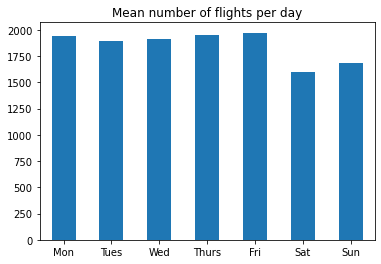

In [14]:
flights_in_day_df["date"] = date_day_df["date"].value_counts().index
flights_in_day_df["day"] = flights_in_day_df["date"].map(date_day_map)

flights_per_day = flights_in_day_df[["flights_in_day","day"]]
mean_flights_per_day = flights_per_day.groupby("day").mean()
mean_flights_per_day = mean_flights_per_day.reindex([ 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


mean_flights_per_day.plot(kind = "bar", legend=False, xlabel="", title="Mean number of flights per day")
plt.xticks(rotation=0)
plt.show()

In [15]:
date_day_df["dt"] = arr

In [16]:
flights_in_day_df["date"] = pd.to_datetime(flights_in_day_df["date"])

<AxesSubplot:title={'center':'Daily Flights in Brazil from 2019 to 2021'}, ylabel='Daily Flights'>

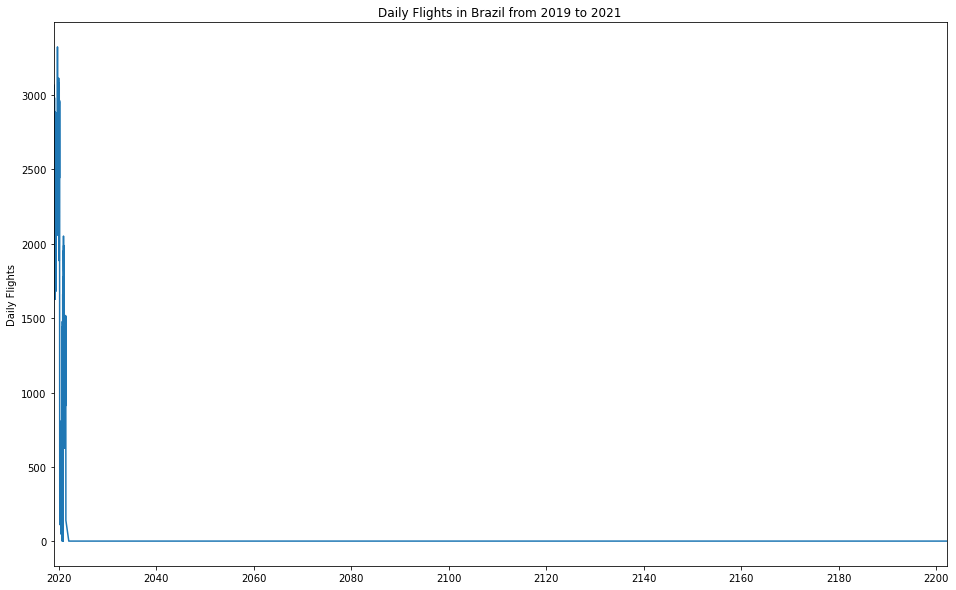

In [17]:
flights_in_day_df["flights_in_day"].plot(kind="line", xlim=(flights_in_day_df.loc[flights_in_day_df["flights_in_day"]>500]["date"].sort_values().iloc[0],       flights_in_day_df.loc[flights_in_day_df["flights_in_day"]>0]["date"].sort_index().iloc[-1]), figsize=(16,10), ylabel="Daily Flights", title="Daily Flights in Brazil from 2019 to 2021")

In [18]:
flights_no_july = flights[flights["real_arr"].sort_values()<datetime.strptime("2021-07-01 00:00:00","%Y-%m-%d %H:%M:%S")]

<ipython-input-18-9efb8bc66594>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  flights_no_july = flights[flights["real_arr"].sort_values()<datetime.strptime("2021-07-01 00:00:00","%Y-%m-%d %H:%M:%S")]


<AxesSubplot:title={'center':'Monthly Flights in Brazil from 2019 to 2021'}, ylabel='Monthly Flights'>

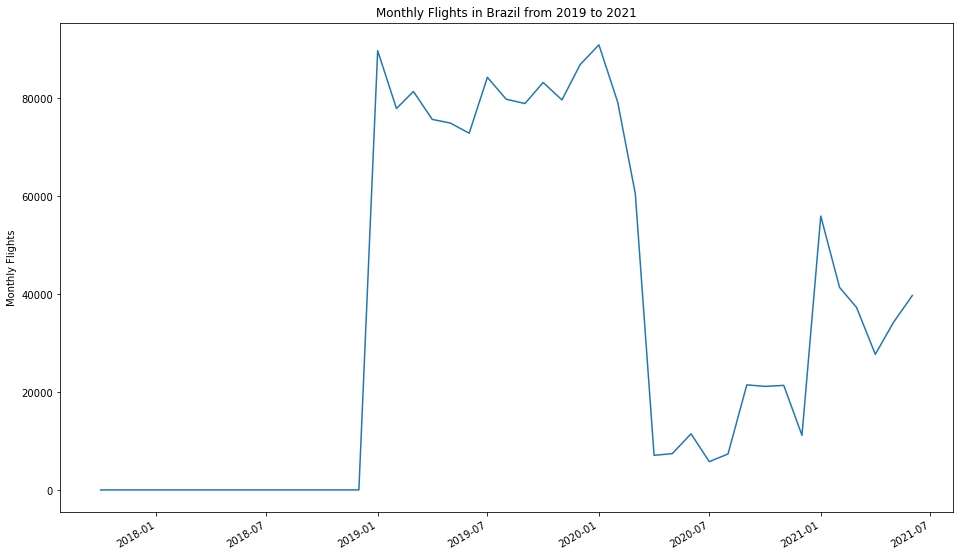

In [19]:
def month_year(dt_object):
    string = dt_object.strftime("%m-%Y")
    week = datetime.strptime(string, "%m-%Y")
    return week
    
flights_no_july["real_arr"].apply(month_year).value_counts().sort_index().plot(kind="line", figsize=(16,10), ylabel="Monthly Flights", title="Monthly Flights in Brazil from 2019 to 2021")

In [20]:
dest_city_vc = flights["dest_city"].value_counts() 
paulo_guar_str = dest_city_vc.index[0]
paulo_str = dest_city_vc.index[2]

In [21]:
#DONT RE-RUN
dest_city_vc.loc[paulo_str] = dest_city_vc.loc[paulo_guar_str] + dest_city_vc.loc[paulo_str]

In [22]:
#DONT RE-RUN
dest_city_vc = dest_city_vc.drop(paulo_guar_str)
dest_c_vc_10 = dest_city_vc.sort_values(ascending=False).head(10)

Text(0.5, 0, 'Total Flights')

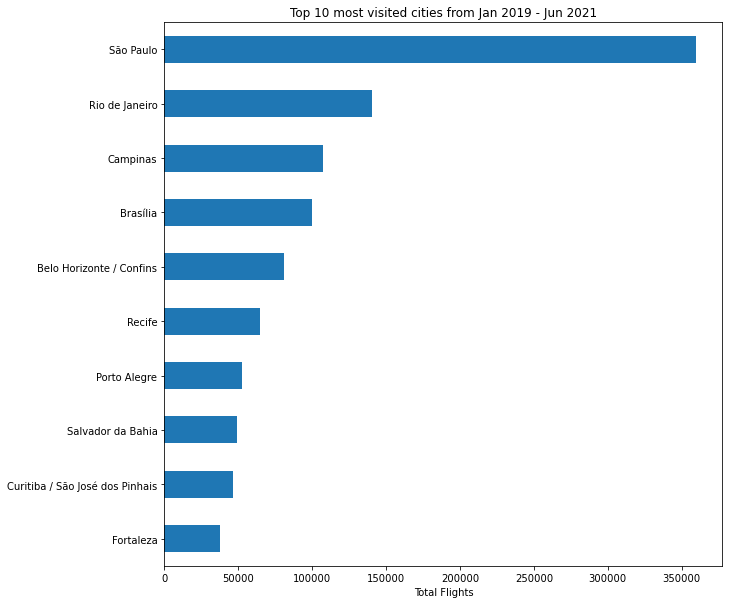

In [23]:
d_10_order = dest_c_vc_10.iloc[::-1]
d_10_order.plot(kind="barh", title="Top 10 most visited cities from Jan 2019 - Jun 2021", figsize=(10,10))
plt.xlabel("Total Flights")